<a href="https://colab.research.google.com/github/SelRncn/TLG/blob/main/Solucion_Reto_SC_63_SeleneRodriguez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Módulo 10. Aprendizaje Supervisado**
# **Reto: Mercadotecnia telefónica con aprendizaje supervisado**

Selene Rodríguez Rincón

***1.	Importa las librerías requeridas***

In [5]:
import pandas as pd
import numpy as np

!pip install -U scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

***2.	Lee el archivo CSV llamado bank_marketing.csv y coloca los datos en un frame de Pandas llamado data***

In [6]:
data = pd.read_csv('/content/bank_marketing_RETO_DS_AS.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,self-employed,married,tertiary,no,2666,no,no,cellular,10,nov,318,2,97,6,success,yes
1,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes
2,41,blue-collar,married,secondary,no,2152,yes,no,cellular,17,nov,369,1,-1,0,unknown,no
3,50,blue-collar,married,secondary,no,84,yes,no,cellular,17,jul,18,8,-1,0,unknown,no
4,40,admin.,married,secondary,no,0,no,no,cellular,28,jul,496,2,182,11,success,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,42,blue-collar,married,secondary,no,314,yes,yes,unknown,16,may,269,2,-1,0,unknown,no
8996,32,blue-collar,married,secondary,no,491,yes,no,unknown,8,may,223,2,-1,0,unknown,no
8997,44,services,single,secondary,no,2886,no,no,unknown,20,jun,31,1,-1,0,unknown,no
8998,57,services,married,primary,no,491,yes,no,cellular,15,apr,1217,3,-1,0,unknown,yes


***3.	Obtener la información de dicha base de datos***

Incluir el número de registros, el total de variables, el tipo de cada variable, la cantidad de datos perdidos de cada variable en caso de que existan

In [7]:
# Información del dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB
None


In [8]:
# Descripción del dataset
print(data.describe())

               age       balance          day     duration     campaign  \
count  9000.000000   9000.000000  9000.000000  9000.000000  9000.000000   
mean     41.090556   1482.262778    15.619556   353.832778     2.520111   
std      11.664253   3031.013197     8.345305   336.945158     2.737758   
min      18.000000  -3058.000000     1.000000     3.000000     1.000000   
25%      32.000000    109.000000     8.000000   131.000000     1.000000   
50%      39.000000    519.000000    15.000000   240.500000     2.000000   
75%      49.000000   1646.500000    21.000000   462.000000     3.000000   
max      95.000000  81204.000000    31.000000  3253.000000    58.000000   

             pdays     previous  
count  9000.000000  9000.000000  
mean     50.511333     0.788889  
std     107.691963     2.210273  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     850.000000    58.000000  


In [9]:
# Verificación de datos faltantes
print("Datos faltantes por columna:")
print(data.isnull().sum())

Datos faltantes por columna:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


***4. Transforma las variables categóricas de manera que puedan ser tratadas numéricamente***

Justifica si utilizas LabelEncoder o OneHotEcoder.

In [10]:
# Usaremos OneHotEncoder para variables categóricas sin orden y LabelEncoder para aquellas con orden.
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col == 'y':  # No se trasforma la variable de salida aquí
        continue
    data = pd.get_dummies(data, columns=[col], drop_first=True)

***5. Transforma las variables numéricas en los casos que se tenga algún tipo de sesgo***

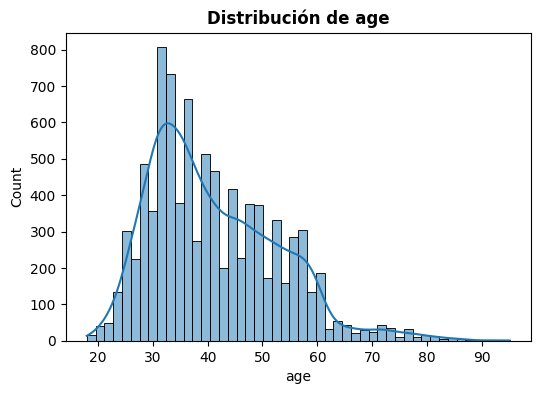

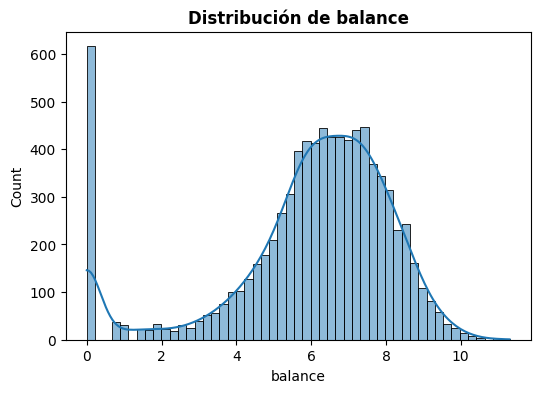

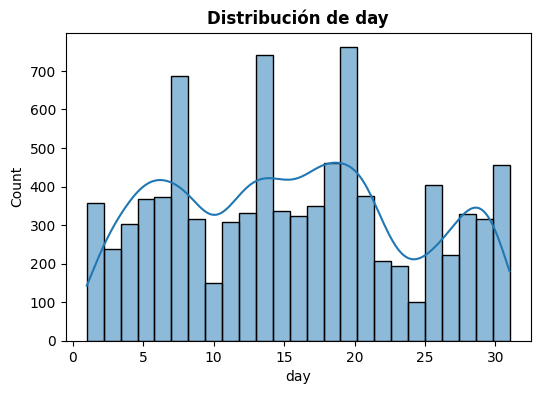

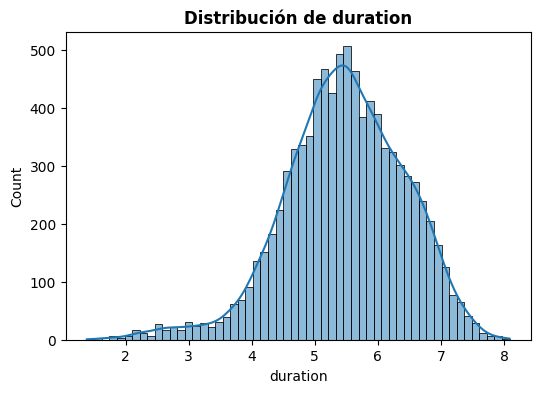

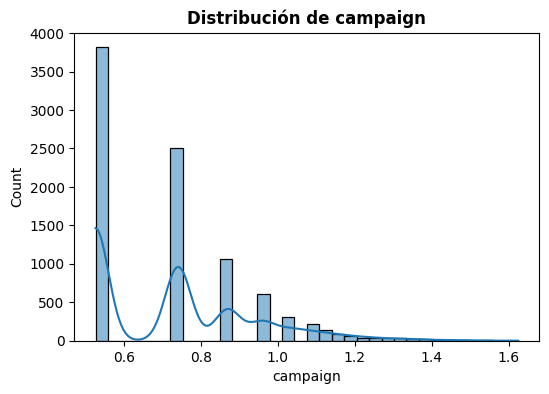

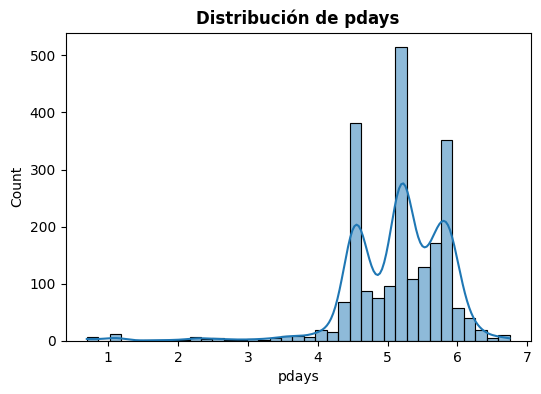

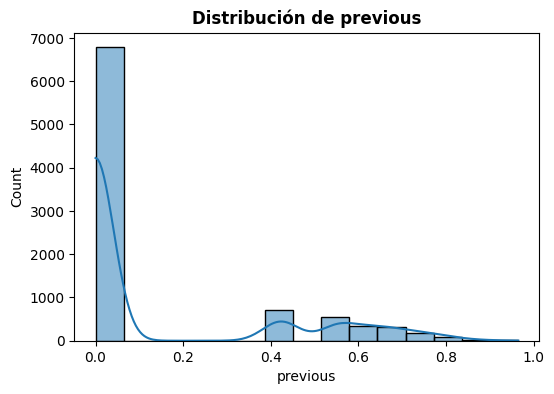

In [55]:
# Visualización y transformación de variables numéricas con sesgo
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Visualizamos las distribuciones
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribución de {col}', fontsize=12, fontweight='bold')
    plt.show()

In [17]:
# Aplicamos transformaciones si hay sesgo significativo
for col in numerical_cols:
    if data[col].skew() > 1:  # Sesgo positivo
        # Solo aplicamos logaritmo a valores>0
        data[col] = data[col].apply(lambda x: np.log1p(x) if x > 0 else 0)
    elif data[col].skew() < -1:  # Sesgo negativo
        # Aseguramos que la raíz cuadrada solo se aplique a valores no negativos
        data[col] = np.sqrt(data[col].max() + 1 - data[col].clip(upper=0))

***6.	Considera la variable “y” como la variable de salida y el resto de las variables como las variables de entrada***

In [18]:
# Separar variable objetivo y variables predictoras
X = data.drop(columns=['y'])
y = data['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Se hace una codificación de 'y' : 'yes' = 1 y 'no' = 0

***7. Particiona los datos en los conjuntos de entrenamiento, validación y prueba en 60%, 20% y 20%, respectivamente***

In [21]:
# Verificar si existen valores infinitos o NaN en X
display("¿Hay valores infinitos en X?", np.isinf(X).any())
display("¿Hay valores NaN en X?", np.isnan(X).any())

'¿Hay valores infinitos en X?'

,0
age,False
balance,True
day,False
duration,False
campaign,False
pdays,True
previous,False
job_blue-collar,False
job_entrepreneur,False
job_housemaid,False


'¿Hay valores NaN en X?'

,0
age,False
balance,True
day,False
duration,False
campaign,False
pdays,False
previous,False
job_blue-collar,False
job_entrepreneur,False
job_housemaid,False


In [22]:
# Reemplazar valores infinitos con el valor máximo finito de cada columna
X = np.where(np.isinf(X), np.nan, X)
X = pd.DataFrame(X)
X.fillna(X.mean(), inplace=True)
X = X.values

<ipython-input-22-4c42a0906c09>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.fillna(X.mean(), inplace=True)  # Reemplazar NaN con el promedio de cada columna


In [24]:
# División de los datos en entrenamiento, validación y prueba (sin aplicar scaler)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [25]:
# Aplicar el escalado por separado a cada conjunto
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

***8. Aplica el modelo Regresión Logística en el conjunto de entrenamiento***

Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión.

Ajusta los parámetros del modelo hasta obtener tu mejor resultado

In [30]:
# Modelo de Regresión Logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_val_log = log_reg.predict(X_val)

# Evaluación del modelo de Regresión Logística: Matriz de Confusión
print("Matriz de confusión - Regresión Logística (Validación):")
print(confusion_matrix(y_val, y_pred_val_log))

Matriz de confusión - Regresión Logística (Validación):
[[896 162]
 [163 579]]


In [31]:
# Evaluación del modelo de Regresión Logística: Reporte de Clasificación
print("Reporte de clasificación - Regresión Logística (Validación):")
print(classification_report(y_val, y_pred_val_log))

Reporte de clasificación - Regresión Logística (Validación):
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1058
           1       0.78      0.78      0.78       742

    accuracy                           0.82      1800
   macro avg       0.81      0.81      0.81      1800
weighted avg       0.82      0.82      0.82      1800



***9. Aplica el modelo Red Neuronal en el conjunto de entrenamiento***

Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión. Ajusta los parámetros del modelo hasta obtener tu mejor modelo, entre ellos el número de neuronas y capas ocultas

In [34]:
# Modelo de Red Neuronal
mlp = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred_val_mlp = mlp.predict(X_val)

Matriz de confusión - Red Neuronal (Validación):
[[890 168]
 [199 543]]


In [35]:
# Evaluación del modelo de Red Neuronal: Matriz de Confusión
print("Matriz de confusión - Red Neuronal (Validación):")
print(confusion_matrix(y_val, y_pred_val_mlp))

Matriz de confusión - Red Neuronal (Validación):
[[890 168]
 [199 543]]


In [36]:
# Evaluación del modelo de Regresión Logística: Reporte de Clasificación
print("Reporte de clasificación - Red Neuronal (Validación):")
print(classification_report(y_val, y_pred_val_mlp))

Reporte de clasificación - Red Neuronal (Validación):
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1058
           1       0.76      0.73      0.75       742

    accuracy                           0.80      1800
   macro avg       0.79      0.79      0.79      1800
weighted avg       0.80      0.80      0.80      1800



***10. Selecciona el mejor modelo encontrado***

Utiliza el conjunto de prueba para obtener el desempeño final del modelo y su matriz de confusión

In [40]:
# Selección del mejor modelo basado en desempeño de validación
best_model = log_reg if classification_report(y_val, y_pred_val_log, output_dict=True)['accuracy'] > \
             classification_report(y_val, y_pred_val_mlp, output_dict=True)['accuracy'] else mlp

# Evaluación final en el conjunto de prueba
y_pred_test = best_model.predict(X_test)

# Evaluación final en el conjunto de prueba: Matriz de Confusión
print("Matriz de confusión - Mejor modelo (Prueba):")
print(confusion_matrix(y_test, y_pred_test))

Matriz de confusión - Mejor modelo (Prueba):
[[868 137]
 [158 637]]


In [41]:
# Evaluación final en el conjunto de prueba: Reporte de Clasificación
print("Reporte de clasificación - Mejor modelo (Prueba):")
print(classification_report(y_test, y_pred_test))

Reporte de clasificación - Mejor modelo (Prueba):
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1005
           1       0.82      0.80      0.81       795

    accuracy                           0.84      1800
   macro avg       0.83      0.83      0.83      1800
weighted avg       0.84      0.84      0.84      1800



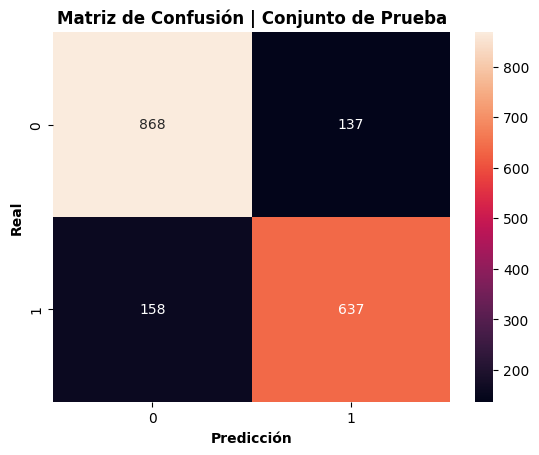

In [46]:
# Visualización de la matriz de confusión del mejor modelo
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt="d")
plt.title("Matriz de Confusión | Conjunto de Prueba", fontsize=12, fontweight='bold')
plt.xlabel("Predicción", fontweight='bold')
plt.ylabel("Real", fontweight='bold')
plt.show()

# **¡Muchas gracias por el reto!** 👍